![PyParis 2018](PyParis-banner.png)

# Modern pandas @ PyParis 2018

### Hervé Mignot

herve.mignot at equancy.com

## Everything starts with pandas

In [2]:
import pandas as pd

### Discovering the data file

In [60]:
pd.read_csv('./Prix2017.zip', nrows=5)

,1000001;01000;R;4620114;519791;2017-01-02T09:37:03;1;Gazole;1258
0,1000001;01000;R;4620114;519791;2017-01-03T09:5...
1,1000001;01000;R;4620114;519791;2017-01-06T12:3...
2,1000001;01000;R;4620114;519791;2017-01-09T08:5...
3,1000001;01000;R;4620114;519791;2017-01-10T10:3...
4,1000001;01000;R;4620114;519791;2017-01-11T09:0...


In [96]:
%%time
prices_df = (pd.read_csv('./Prix2017.zip',
                         sep=';',
                         header=None,
                         dtype={1: str},
                         parse_dates = [5],
                        )
             # Renaming columns
             .rename(columns={0: 'station_id', 1:'zip_code',
                              3: 'latitude', 4: 'longitude', 5: 'date',
                              7: 'gas_type', 8: 'price'}
                    )
             # Recomputing some columns
             .assign(
                 price = lambda x: x['price'] / 1000,
                 latitude = lambda x: x['latitude'] / 100000,
                 longitude = lambda x: x.longitude / 100000,
             )
             # Removing some columns (axis=1)
             .drop([2, 6,], axis=1)
            )

Wall time: 9.29 s


In [111]:
print("Number of rows: {:,d}".format(prices_df.shape[0]))
print("Columns:", ", ".join(prices_df.columns))

Number of rows: 3,662,353
Columns: station_id, zip_code, latitude, longitude, date, gas_type, price


In [112]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662353 entries, 0 to 3662352
Data columns (total 7 columns):
station_id    int64
zip_code      object
latitude      float64
longitude     float64
date          datetime64[ns]
gas_type      object
price         float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 195.6+ MB


### Reading the station file

In [113]:
STATIONS_HEADER = ['station_id', 'zip_code', 'type', 'latitude', 'longitude', 'address', 'city']

stations_df = (pd.read_csv('./Stations2017.zip',
                           sep='|',
                           header=None,
                           dtype={1: str},
                           names=STATIONS_HEADER,
                          )
               .assign(
                   latitude = lambda x: x.latitude / 100000,
                   longitude = lambda x: x.longitude / 100000,
               )
              )

stations_df.head(3)

,station_id,zip_code,type,latitude,longitude,address,city
0,1000001,01000,R,46.201140,5.197910,596 AVENUE DE TREVOUX,SAINT-DENIS-LèS-BOURG
1,1000002,01000,R,46.218420,5.227670,16 Avenue de Marboz,BOURG-EN-BRESSE
2,1000004,01000,R,0.000052,0.000462,20 Avenue du Maréchal Juin,Bourg-en-Bresse


## Filtering rows

### Using .loc[ ]

In [114]:
stations_df.loc[stations_df.zip_code == "94270"]

,station_id,zip_code,type,latitude,longitude,address,city
12268,94270003,94270,R,48.80778,2.3628,136 Avenue de Fontainebleau,LE KREMLIN-BICêTRE
12269,94270005,94270,R,48.81193,2.3618,Avenue de Fontainebleau,LE KREMLIN-BICêTRE


In several situations, we will have a "reference problem": how to refer to the dataframe as it is when calling the function.

Sometimes, we have a method available that will help:

### Using .query()

In [115]:
stations_df.query('zip_code == "94270"')

,station_id,zip_code,type,latitude,longitude,address,city
12268,94270003,94270,R,48.80778,2.3628,136 Avenue de Fontainebleau,LE KREMLIN-BICêTRE
12269,94270005,94270,R,48.81193,2.3618,Avenue de Fontainebleau,LE KREMLIN-BICêTRE


In [116]:
ZIP = "94270"

stations_df.query('zip_code == @ZIP')

,station_id,zip_code,type,latitude,longitude,address,city
12268,94270003,94270,R,48.80778,2.3628,136 Avenue de Fontainebleau,LE KREMLIN-BICêTRE
12269,94270005,94270,R,48.81193,2.3618,Avenue de Fontainebleau,LE KREMLIN-BICêTRE


## Filtering columns

### Using loc[ ] (both ways, for subtables)

In [89]:
(pd.read_csv('./Stations2017.zip',
             sep='|',
             header=None,
             dtype={1: str},
             names=STATIONS_HEADER,
            )
 .loc[lambda x: x.zip_code == '94270', ['address', 'city']]
)

,address,city
12268,136 Avenue de Fontainebleau,LE KREMLIN-BICêTRE
12269,Avenue de Fontainebleau,LE KREMLIN-BICêTRE


### Using [ ]

In [93]:
(pd.read_csv('./Stations2017.zip',
             sep='|',
             header=None,
             dtype={1: str},
             names=STATIONS_HEADER,
            )
 [['address', 'city']]
).head(4)

,address,city
0,596 AVENUE DE TREVOUX,SAINT-DENIS-LèS-BOURG
1,16 Avenue de Marboz,BOURG-EN-BRESSE
2,20 Avenue du Maréchal Juin,Bourg-en-Bresse
3,642 Avenue de Trévoux,SAINT-DENIS-LèS-BOURG


In [94]:
(pd.read_csv('./Stations2017.zip',
             sep='|',
             header=None,
             dtype={1: str},
             names=STATIONS_HEADER,
            )
 [STATIONS_HEADER[:-1]]
).head(4)

,station_id,zip_code,type,latitude,longitude,address
0,1000001,01000,R,4.620114e+06,519791.000000,596 AVENUE DE TREVOUX
1,1000002,01000,R,4.621842e+06,522767.000000,16 Avenue de Marboz
2,1000004,01000,R,5.245000e+00,46.188000,20 Avenue du Maréchal Juin
3,1000005,01000,R,4.620094e+06,519942.024022,642 Avenue de Trévoux


## Computing new columns

### With assign()

In [85]:
stations_df = (pd.read_csv('./Stations2017.zip',
                           sep='|',
                           header=None,
                           dtype={1: str},
                           names=STATIONS_HEADER,
                          )
               .assign(
                   latitude = lambda x: x.latitude / 100000,
                   longitude = lambda x: x.longitude / 100000,
               )
              )

Still the "reference problem", we used lambdas to refer to the previous result.

In [117]:
stations_df = (pd.read_csv('./Stations2017.zip',
                           sep='|',
                           header=None,
                           dtype={1: str},
                           names=STATIONS_HEADER,
                          )
              )

## DANGEROUS ##
(stations_df
 .query('zip_code == "94270"')
 .assign(department = stations_df.zip_code.str[:2])
)

,station_id,zip_code,type,latitude,longitude,address,city,department
12268,94270003,94270,R,4880778.0,236280.0,136 Avenue de Fontainebleau,LE KREMLIN-BICêTRE,94
12269,94270005,94270,R,4881193.0,236180.0,Avenue de Fontainebleau,LE KREMLIN-BICêTRE,94


In [118]:
## AND OBVIOUSLY WRONG ##
(stations_df
 .query('zip_code == "94270"')
 .assign(zip_code = 'A' + stations_df.zip_code)
 .assign(department = stations_df.zip_code.str[:2])
)

,station_id,zip_code,type,latitude,longitude,address,city,department
12268,94270003,A94270,R,4880778.0,236280.0,136 Avenue de Fontainebleau,LE KREMLIN-BICêTRE,94
12269,94270005,A94270,R,4881193.0,236180.0,Avenue de Fontainebleau,LE KREMLIN-BICêTRE,94


In [71]:
stations_df = (pd.read_csv('./Stations2017.zip',
                           sep='|',
                           header=None,
                           dtype={1: str},
                           names=STATIONS_HEADER,
                          )
               .assign(
                   latitude = lambda x: x.latitude / 100000,
                   longitude = lambda x: x.longitude / 100000,
               )
              )

## Something more interesting now

Generating grouped data for data visualization

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('figure', figsize=(15.0, 8.0))
sns.set()

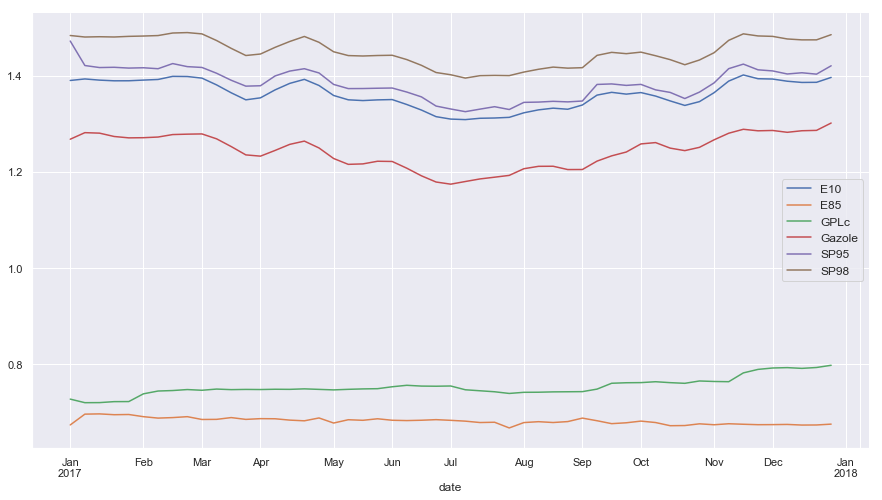

In [144]:
(prices_df
 .dropna(subset=['date'])
 .groupby(['gas_type', pd.Grouper(key='date', freq='1W')])
 ['price']
 .mean()
 .unstack(0)
 .rename_axis('Gas Prices Variations over the year', axis=1)
 .plot()
)
plt.legend(prop={'size': 12})
sns.despine()

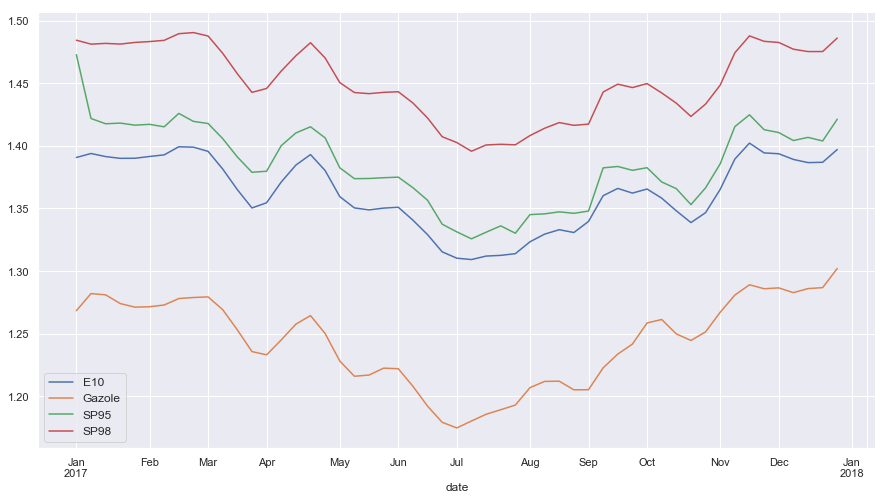

In [145]:
(prices_df
 .dropna(subset=['date'])
 .loc[prices_df['gas_type'].isin(prices_df['gas_type'].value_counts().index[:4])]
 .groupby(['gas_type', pd.Grouper(key='date', freq='1W')])
 ['price']
 .mean()
 .unstack(0)
 .rename_axis('Gas Prices Variations over the year', axis=1)
 .plot()
)
plt.legend(prop={'size': 12})
sns.despine()

## Controling the pipeline

### with engarde module

In [40]:
import engarde.checks as checks

In [109]:
stations_df.columns

Index(['address', 'city'], dtype='object')

In [124]:
(stations_df
 .pipe(checks.is_shape, (None, 7))
).head()

,station_id,zip_code,type,latitude,longitude,address,city
0,1000001,01000,R,4.620114e+06,519791.000000,596 AVENUE DE TREVOUX,SAINT-DENIS-LèS-BOURG
1,1000002,01000,R,4.621842e+06,522767.000000,16 Avenue de Marboz,BOURG-EN-BRESSE
2,1000004,01000,R,5.245000e+00,46.188000,20 Avenue du Maréchal Juin,Bourg-en-Bresse
3,1000005,01000,R,4.620094e+06,519942.024022,642 Avenue de Trévoux,SAINT-DENIS-LèS-BOURG
4,1000006,01000,R,4.620754e+06,523758.000000,1 Boulevard John Kennedy,BOURG-EN-BRESSE


In [50]:
pd.DataFrame.check_is_shape = engarde.checks.is_shape

In [52]:
stations_df.check_is_shape((None, 8)).assign(test = 'Cool').head()

AssertionError: Expected shape: (None, 8)
		Actual shape:   (12559, 7)